## カーネル関数

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

※ 以下の$k( \mathbf{x}_i, \mathbf{x}_j)$はカーネル関数を表す記号  

### 線形カーネル関数
線形カーネル関数は以下の式になる。  
これは、データ$\mathbf{x}_i$とデータ$\mathbf{x}_j$の内積を計算していることと同じである。  
$k( \mathbf{x}_i, \mathbf{x}_j)$は、ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$が同じ方向を向いていて各要素の値が大きいほど大きくなる。　   
線形カーネルを用いてSVMを解くと、線形の決定境界しかえられない。    
$k( \mathbf{x}_i, \mathbf{x}_j)=\mathbf{x}_i^T \mathbf{x}_j$  
$\mathbf{x}_i=(x_1,x_2,...x_d)$:多次元変数  
$\mathbf{x}_j=(x_1,x_2,...x_d)$:多次元変数  
$d$ : データの次元  
$i,j = 1,2,3,...N$  
$N$: データ数  

### ガウスカーネル関数
非線形カーネルガウスのうち最もよく用いられるのは、ガウスカーネル関数である。  
ガウスカーネル関数は以下の式になる。  
$k( \mathbf{x}_i, \mathbf{x}_j)$は、ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$の差が小さいほど大きくなる。　  
$k( \mathbf{x}_i, \mathbf{x}_j)=exp(-\gamma \|\mathbf{x}_i-\mathbf{x}_j\|^2)$  
$\mathbf{x}_i=(x_1,x_2,...x_d)$:多次元変数  
$\mathbf{x}_j=(x_1,x_2,...x_d)$:多次元変数  
$d$ : データの次元  
$i,j = 1,2,3,...N$  
$N$: データ数  
$\gamma$:データのまとまり具合(ばらつきの逆)を表すパラメータ

#### 1次元(d=1)のときのガウスカーネル関数を描く
$y = \exp(-\gamma(x)^2)$とおく。

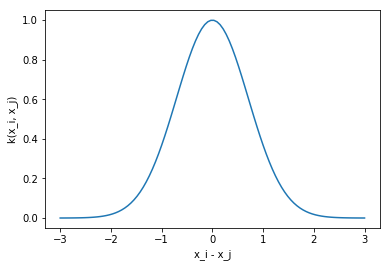

In [16]:
gamma = 1
x = np.linspace(-3,3,100)
y = np.exp(-gamma*np.power(x,2))
plt.plot(x,y)
plt.ylabel("k(x_i, x_j)")
plt.xlabel("x_i - x_j")
plt.show()

- ガウスカーネルは、正規分布になる。パラーメータ$\gamma$は、分布の集まり具合を表す変数である。  
- ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$の差が小さいほど値が大きくなる。つまり、y軸は、ベクトル$\mathbf{x}_i$とベクトル$\mathbf{x}_j$のの近さを表す量になっている。

### [演習]
- $\gamma$の値を変えるとグラフはどうなるでしょうか？

## 2次元データに対するカーネル関数の適応
### [演習]
* ここでは、ガウスカーネル関数と線形カーネル関数のそれぞれを適応した場合の違いを確認します。
* データ生成条件は、まずDATA_TYPE=1を選択し、次にDATA_TYPE=2を選択してください。
* ガウスカーネルの$\gamma$の値も変えてみましょう。

In [21]:
DATA_TYPE = 2

if DATA_TYPE==1:
    """
    線形分離可能なデータセット
    """
    X1  = np.array([[  -0.5,  -0.3, -0.3,   -0.1,  -0.1,   0.1,  0.1,  0.3,  0.3],
                               [       0,  -0.6,   0.6,  -1.3,    1.3, -1.9,   1.9, -2.5,  2.5] 
                          ])
    X2  = np.array([[0.5, 0.7, 0.9,  1.0],
                               [    0,     0,    0,     0]
                           ])
    
elif DATA_TYPE==2:
    """
    線形分離不可能なデータセット
    """
    X1  = np.array([[-0.3, -0.3,  0.5,  0.5,   0,  0,  -0.5,      1,   1],
                                [-0.6,  0.6, -1.5,  1.2,  -1,  1,      0, -1.5, 1.5]
                          ])
    X2  = np.array([[0.5, 0.7, 0.9,  1.0],
                              [     0,     0,    0,      0]
                           ])
    
# num_x1 = X1.shape[1]
X = np.hstack((X1,X2))
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.3,-0.3,0.5,0.5,0.0,0.0,-0.5,1.0,1.0,0.5,0.7,0.9,1.0
1,-0.6,0.6,-1.5,1.2,-1.0,1.0,0.0,-1.5,1.5,0.0,0.0,0.0,0.0


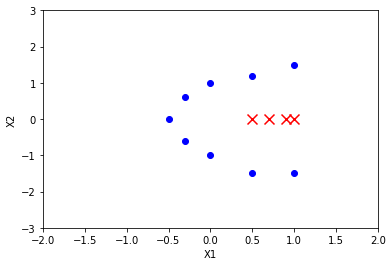

In [22]:
plt.scatter(X1[0],X1[1],marker="o",color="b")
plt.scatter(X2[0],X2[1],marker="x",color="r",s=100)
plt.xlim([-2,2])
plt.ylim([-3,3])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### 2次元データに対する線形カーネル関数の適応

In [23]:
def k_linear(x, x_):
    """
    線形カーネル関数
    """
    return np.dot(x, x_)
    
N = X.shape[1]
K = np.zeros([N,N])
for i in range(N):
    x = X[:,i]
    for j in range(N):
        x_ = X[:,j]
        k = k_linear(x, x_)
        K[i, j] = k
print(K)

[[ 0.45 -0.27  0.75 -0.87  0.6  -0.6   0.15  0.6  -1.2  -0.15 -0.21 -0.27
  -0.3 ]
 [-0.27  0.45 -1.05  0.57 -0.6   0.6   0.15 -1.2   0.6  -0.15 -0.21 -0.27
  -0.3 ]
 [ 0.75 -1.05  2.5  -1.55  1.5  -1.5  -0.25  2.75 -1.75  0.25  0.35  0.45
   0.5 ]
 [-0.87  0.57 -1.55  1.69 -1.2   1.2  -0.25 -1.3   2.3   0.25  0.35  0.45
   0.5 ]
 [ 0.6  -0.6   1.5  -1.2   1.   -1.    0.    1.5  -1.5   0.    0.    0.
   0.  ]
 [-0.6   0.6  -1.5   1.2  -1.    1.    0.   -1.5   1.5   0.    0.    0.
   0.  ]
 [ 0.15  0.15 -0.25 -0.25  0.    0.    0.25 -0.5  -0.5  -0.25 -0.35 -0.45
  -0.5 ]
 [ 0.6  -1.2   2.75 -1.3   1.5  -1.5  -0.5   3.25 -1.25  0.5   0.7   0.9
   1.  ]
 [-1.2   0.6  -1.75  2.3  -1.5   1.5  -0.5  -1.25  3.25  0.5   0.7   0.9
   1.  ]
 [-0.15 -0.15  0.25  0.25  0.    0.   -0.25  0.5   0.5   0.25  0.35  0.45
   0.5 ]
 [-0.21 -0.21  0.35  0.35  0.    0.   -0.35  0.7   0.7   0.35  0.49  0.63
   0.7 ]
 [-0.27 -0.27  0.45  0.45  0.    0.   -0.45  0.9   0.9   0.45  0.63  0.81
   0.9 ]
 [-0.3  -0

In [24]:
# Kを可視化する
cm = sns.light_palette("green", as_cmap=True)

df = pd.DataFrame(K)
df -= np.mean(df.values) # 標準化
df /=np.std(df.values) # 標準化

df["min"] = np.min(df.values) #カラーテーブルを適切に表示させるための列
df["max"] = np.max(df.values) #カラーテーブルを適切に表示させるための列
print("グラム行列:")
df.round(3).style.background_gradient(cmap=cm, axis=1)

グラム行列:


,0,1,2,3,4,5,6,7,8,9,10,11,12,min,max
0,0.325,-0.451,0.649,-1.098,0.487,-0.807,0.002,0.487,-1.454,-0.322,-0.386,-0.451,-0.484,-2.047,3.344
1,-0.451,0.325,-1.292,0.454,-0.807,0.487,0.002,-1.454,0.487,-0.322,-0.386,-0.451,-0.484,-2.047,3.344
2,0.649,-1.292,2.535,-1.831,1.457,-1.777,-0.43,2.805,-2.047,0.109,0.217,0.325,0.379,-2.047,3.344
3,-1.098,0.454,-1.831,1.662,-1.454,1.134,-0.43,-1.562,2.32,0.109,0.217,0.325,0.379,-2.047,3.344
4,0.487,-0.807,1.457,-1.454,0.918,-1.238,-0.16,1.457,-1.777,-0.16,-0.16,-0.16,-0.16,-2.047,3.344
5,-0.807,0.487,-1.777,1.134,-1.238,0.918,-0.16,-1.777,1.457,-0.16,-0.16,-0.16,-0.16,-2.047,3.344
6,0.002,0.002,-0.43,-0.43,-0.16,-0.16,0.109,-0.699,-0.699,-0.43,-0.537,-0.645,-0.699,-2.047,3.344
7,0.487,-1.454,2.805,-1.562,1.457,-1.777,-0.699,3.344,-1.508,0.379,0.595,0.81,0.918,-2.047,3.344
8,-1.454,0.487,-2.047,2.32,-1.777,1.457,-0.699,-1.508,3.344,0.379,0.595,0.81,0.918,-2.047,3.344
9,-0.322,-0.322,0.109,0.109,-0.16,-0.16,-0.43,0.379,0.379,0.109,0.217,0.325,0.379,-2.047,3.344


* 行および列の番号は、データ点の番号を意味する。0~9は青○ラベルのデータ、10~12は赤×ラベルのデータである。
* 表の値はあるデータ点とあるデータ点の類似度を表している。同じ方向を向いていて要素の値が大きいほど、表の値が大きくなる。

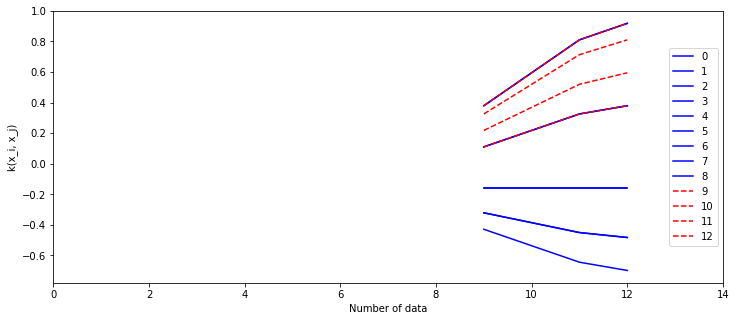

In [25]:
# グラム行列の下から4行だけで折れ線グラフを描く
ax1 = df.iloc[9:,:9].plot(color="b", figsize=(12,5))
df.iloc[9:,9:13].plot(color="r", ax=ax1, ls="--")
plt.ylabel("k(x_i, x_j)")
plt.xlabel("Number of data")
plt.legend(loc="right")
plt.xlim([0,14])
plt.show()

### [DATA_TYPE=1の場合]
* 0~8と9~12が離れている。それぞれの類似度が異なるためである。元のデータの近さ情報をうまく凝縮できていることになる。
  
### [DATA_TYPE=2の場合]
* 0~8と9~12が混じっている。それぞれ同じ程度の類似度になっているためである。

### 2次元データに対するガウスカーネル関数の適応

In [26]:
def k_gauss(x, x_, gamma):
    """
    ガウスカーネル関数
    """
    return np.exp(-gamma*np.power(np.linalg.norm(x - x_), 2))
    
N = X.shape[1]
K = np.zeros([N,N])
for i in range(N):
    x = X[:,i]
    for j in range(N):
        x_ = X[:,j]
        k = k_gauss(x, x_, gamma=1)
        K[i, j] = k
print(K.round(2))

[[1.   0.24 0.23 0.02 0.78 0.07 0.67 0.08 0.   0.37 0.26 0.17 0.13]
 [0.24 1.   0.01 0.37 0.07 0.78 0.67 0.   0.08 0.37 0.26 0.17 0.13]
 [0.23 0.01 1.   0.   0.61 0.   0.04 0.78 0.   0.11 0.1  0.09 0.08]
 [0.02 0.37 0.   1.   0.01 0.75 0.09 0.   0.71 0.24 0.23 0.2  0.18]
 [0.78 0.07 0.61 0.01 1.   0.02 0.29 0.29 0.   0.29 0.23 0.16 0.14]
 [0.07 0.78 0.   0.75 0.02 1.   0.29 0.   0.29 0.29 0.23 0.16 0.14]
 [0.67 0.67 0.04 0.09 0.29 0.29 1.   0.01 0.01 0.37 0.24 0.14 0.11]
 [0.08 0.   0.78 0.   0.29 0.   0.01 1.   0.   0.08 0.1  0.1  0.11]
 [0.   0.08 0.   0.71 0.   0.29 0.01 0.   1.   0.08 0.1  0.1  0.11]
 [0.37 0.37 0.11 0.24 0.29 0.29 0.37 0.08 0.08 1.   0.96 0.85 0.78]
 [0.26 0.26 0.1  0.23 0.23 0.23 0.24 0.1  0.1  0.96 1.   0.96 0.91]
 [0.17 0.17 0.09 0.2  0.16 0.16 0.14 0.1  0.1  0.85 0.96 1.   0.99]
 [0.13 0.13 0.08 0.18 0.14 0.14 0.11 0.11 0.11 0.78 0.91 0.99 1.  ]]


In [27]:
# Kの可視化
cm = sns.light_palette("green", as_cmap=True)

df = pd.DataFrame(K)
df -= np.mean(df.values) # 標準化
df /=np.std(df.values) # 標準化


df["min"] = np.min(df.values) #カラーテーブルを適切に表示させるための列
df["max"] = np.max(df.values) #カラーテーブルを適切に表示させるための列
print("グラム行列:")
df.round(3).style.background_gradient(cmap=cm, axis=1)

グラム行列:


,0,1,2,3,4,5,6,7,8,9,10,11,12,min,max
0,2.069,-0.232,-0.239,-0.884,1.402,-0.733,1.075,-0.698,-0.939,0.163,-0.172,-0.448,-0.558,-0.946,2.069
1,-0.232,2.069,-0.927,0.163,-0.733,1.402,1.075,-0.939,-0.698,0.163,-0.172,-0.448,-0.558,-0.946,2.069
2,-0.239,-0.927,2.069,-0.944,0.882,-0.941,-0.829,1.402,-0.946,-0.628,-0.641,-0.675,-0.698,-0.946,2.069
3,-0.884,0.163,-0.944,2.069,-0.927,1.31,-0.683,-0.944,1.2,-0.232,-0.26,-0.337,-0.39,-0.946,2.069
4,1.402,-0.733,0.882,-0.927,2.069,-0.891,-0.082,-0.082,-0.944,-0.082,-0.267,-0.453,-0.538,-0.946,2.069
5,-0.733,1.402,-0.941,1.31,-0.891,2.069,-0.082,-0.944,-0.082,-0.082,-0.267,-0.453,-0.538,-0.946,2.069
6,1.075,1.075,-0.829,-0.683,-0.082,-0.082,2.069,-0.912,-0.912,0.163,-0.232,-0.521,-0.628,-0.946,2.069
7,-0.698,-0.939,1.402,-0.944,-0.082,-0.944,-0.912,2.069,-0.946,-0.698,-0.656,-0.631,-0.628,-0.946,2.069
8,-0.939,-0.698,-0.946,1.2,-0.944,-0.082,-0.912,-0.946,2.069,-0.698,-0.656,-0.631,-0.628,-0.946,2.069
9,0.163,0.163,-0.628,-0.232,-0.082,-0.082,0.163,-0.698,-0.698,2.069,1.95,1.623,1.402,-0.946,2.069


* 行および列の番号は、データ点の番号を意味する。0~9は青○ラベルのデータ、10~12は赤×ラベルのデータである。
* 表の値はあるデータ点とあるデータ点の類似度を表している。2つのデータ点のベクトル差のノルムが0に近いほど、表の値が大きくなる。

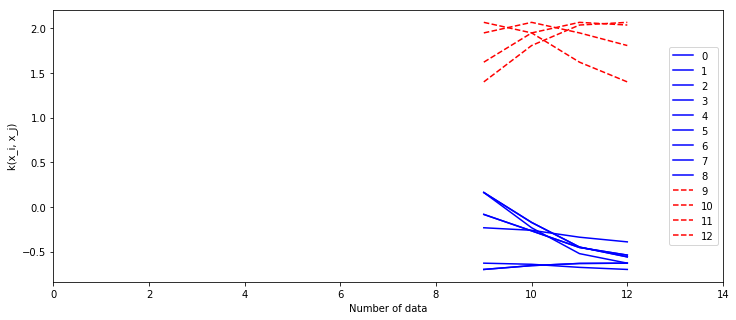

In [28]:
# グラム行列の下から4行だけで折れ線グラフを描く
ax1 = df.iloc[9:,:9].plot(color="b", figsize=(12,5))
df.iloc[9:,9:13].plot(color="r", ax=ax1, ls="--")
plt.ylabel("k(x_i, x_j)")
plt.xlabel("Number of data")
plt.legend(loc="right")
plt.xlim([0,14])
plt.show()

### [DATA_TYPE=1の場合]
* 0~8と9~12が離れている。それぞれの類似度が異なるためである。元のデータの近さ情報をうまく凝縮できていることになる。
  
### [DATA_TYPE=2の場合]
* 0~8と9~12が離れている。それぞれの類似度が異なるためである。元のデータの近さ情報をうまく凝縮できていることになる。